In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from utility.types import RebalanceFrequencyEnum, AllocationMethodsEnum, RegimeDetectionModels

from data.universe import Universe
from data.benchmark import Benchmark

from backtest.backtest import Backtester



In [2]:
bench_obj = Benchmark(RebalanceFrequencyEnum.MONTH_END)
bench_obj.benchmark_perf

Date
2019-10-01    0.999993
2019-10-02    0.981493
2019-10-03    0.983629
2019-10-04    0.990607
2019-10-07    0.993187
                ...   
2024-02-09    1.323521
2024-02-12    1.329863
2024-02-13    1.318233
2024-02-14    1.323629
2024-02-15    1.330020
Freq: B, Name: benchmark_perf, Length: 1143, dtype: float64

In [3]:
univ_obj = Universe()
universe = univ_obj.get_universe_returns()
universe

,MONTAIRE,ETF_GROWTH,ETF_VALUE,ETF_CAC,ETF_SPX
date,,,,,
2016-06-01,0.000000,0.000000,0.000000,0.000000,0.000000
2016-06-02,-0.000010,0.004860,0.004419,0.000442,0.003586
2016-06-03,0.000000,-0.010231,-0.005313,-0.009287,-0.017370
2016-06-06,-0.000020,-0.001316,0.014437,0.003236,0.005692
2016-06-07,0.000000,0.006586,0.005512,0.011012,0.005440
...,...,...,...,...,...
2024-02-22,0.000109,0.010694,0.004420,0.012323,0.020330
2024-02-23,0.000119,0.004429,0.000000,0.006920,0.004213
2024-02-26,0.000307,-0.003491,-0.004490,-0.004200,-0.004097


In [4]:
d =univ_obj.get_universe_returns()
d

,MONTAIRE,ETF_GROWTH,ETF_VALUE,ETF_CAC,ETF_SPX
date,,,,,
2016-06-01,0.000000,0.000000,0.000000,0.000000,0.000000
2016-06-02,-0.000010,0.004860,0.004419,0.000442,0.003586
2016-06-03,0.000000,-0.010231,-0.005313,-0.009287,-0.017370
2016-06-06,-0.000020,-0.001316,0.014437,0.003236,0.005692
2016-06-07,0.000000,0.006586,0.005512,0.011012,0.005440
...,...,...,...,...,...
2024-02-22,0.000109,0.010694,0.004420,0.012323,0.020330
2024-02-23,0.000119,0.004429,0.000000,0.006920,0.004213
2024-02-26,0.000307,-0.003491,-0.004490,-0.004200,-0.004097


Backtesting portfolio...:   0%|          | 0/1143 [00:00<?, ?it/s]


-------  Returns statistical information  --------
Expected return annualized: 7.70 % vs 6.88 % (buy and hold)
CAGR: 7.21 % vs 6.11 % (buy and hold)
Expected volatility annualized: 12.16 % vs 13.82 % (buy and hold)
Specific volatility (diversifiable) annualized: 7.51 %
Systematic volatility annualized: 9.56 %
Skewness: -0.17 vs -1.01 (buy and hold), <0 = left tail, >0 = right tail
Kurtosis: 6.07 vs -1.01 (buy and hold) , >3 = fat tails, <3 = thin tails
95%-VaR: -1.20 % vs -1.26 % (buy and hold) -> the lower the better
95%-CVaR: -1.82 % vs -2.32 % (buy and hold) -> the lower the better

-------  Strategy statistical information  -------
Max drawdown: -20.82 % vs -25.68 % (buy and hold)
Kelly criterion: 5.98 % vs 5.19 % (buy and hold)
Benchmark sensitivity (beta): 0.69 vs 1 (buy and hold)
Determination coefficient R²: 0.62
Tracking error annualized: 8.63 %

---------------  Strategy ratios  ----------------
No risk free rate considered for the following ratios.

Sharpe ratio annualized:

c:\_sharedFS\Ecole\Cross-Asset-Investment-Solutions\Cross-Asset-Investment-Solutions\.venv\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


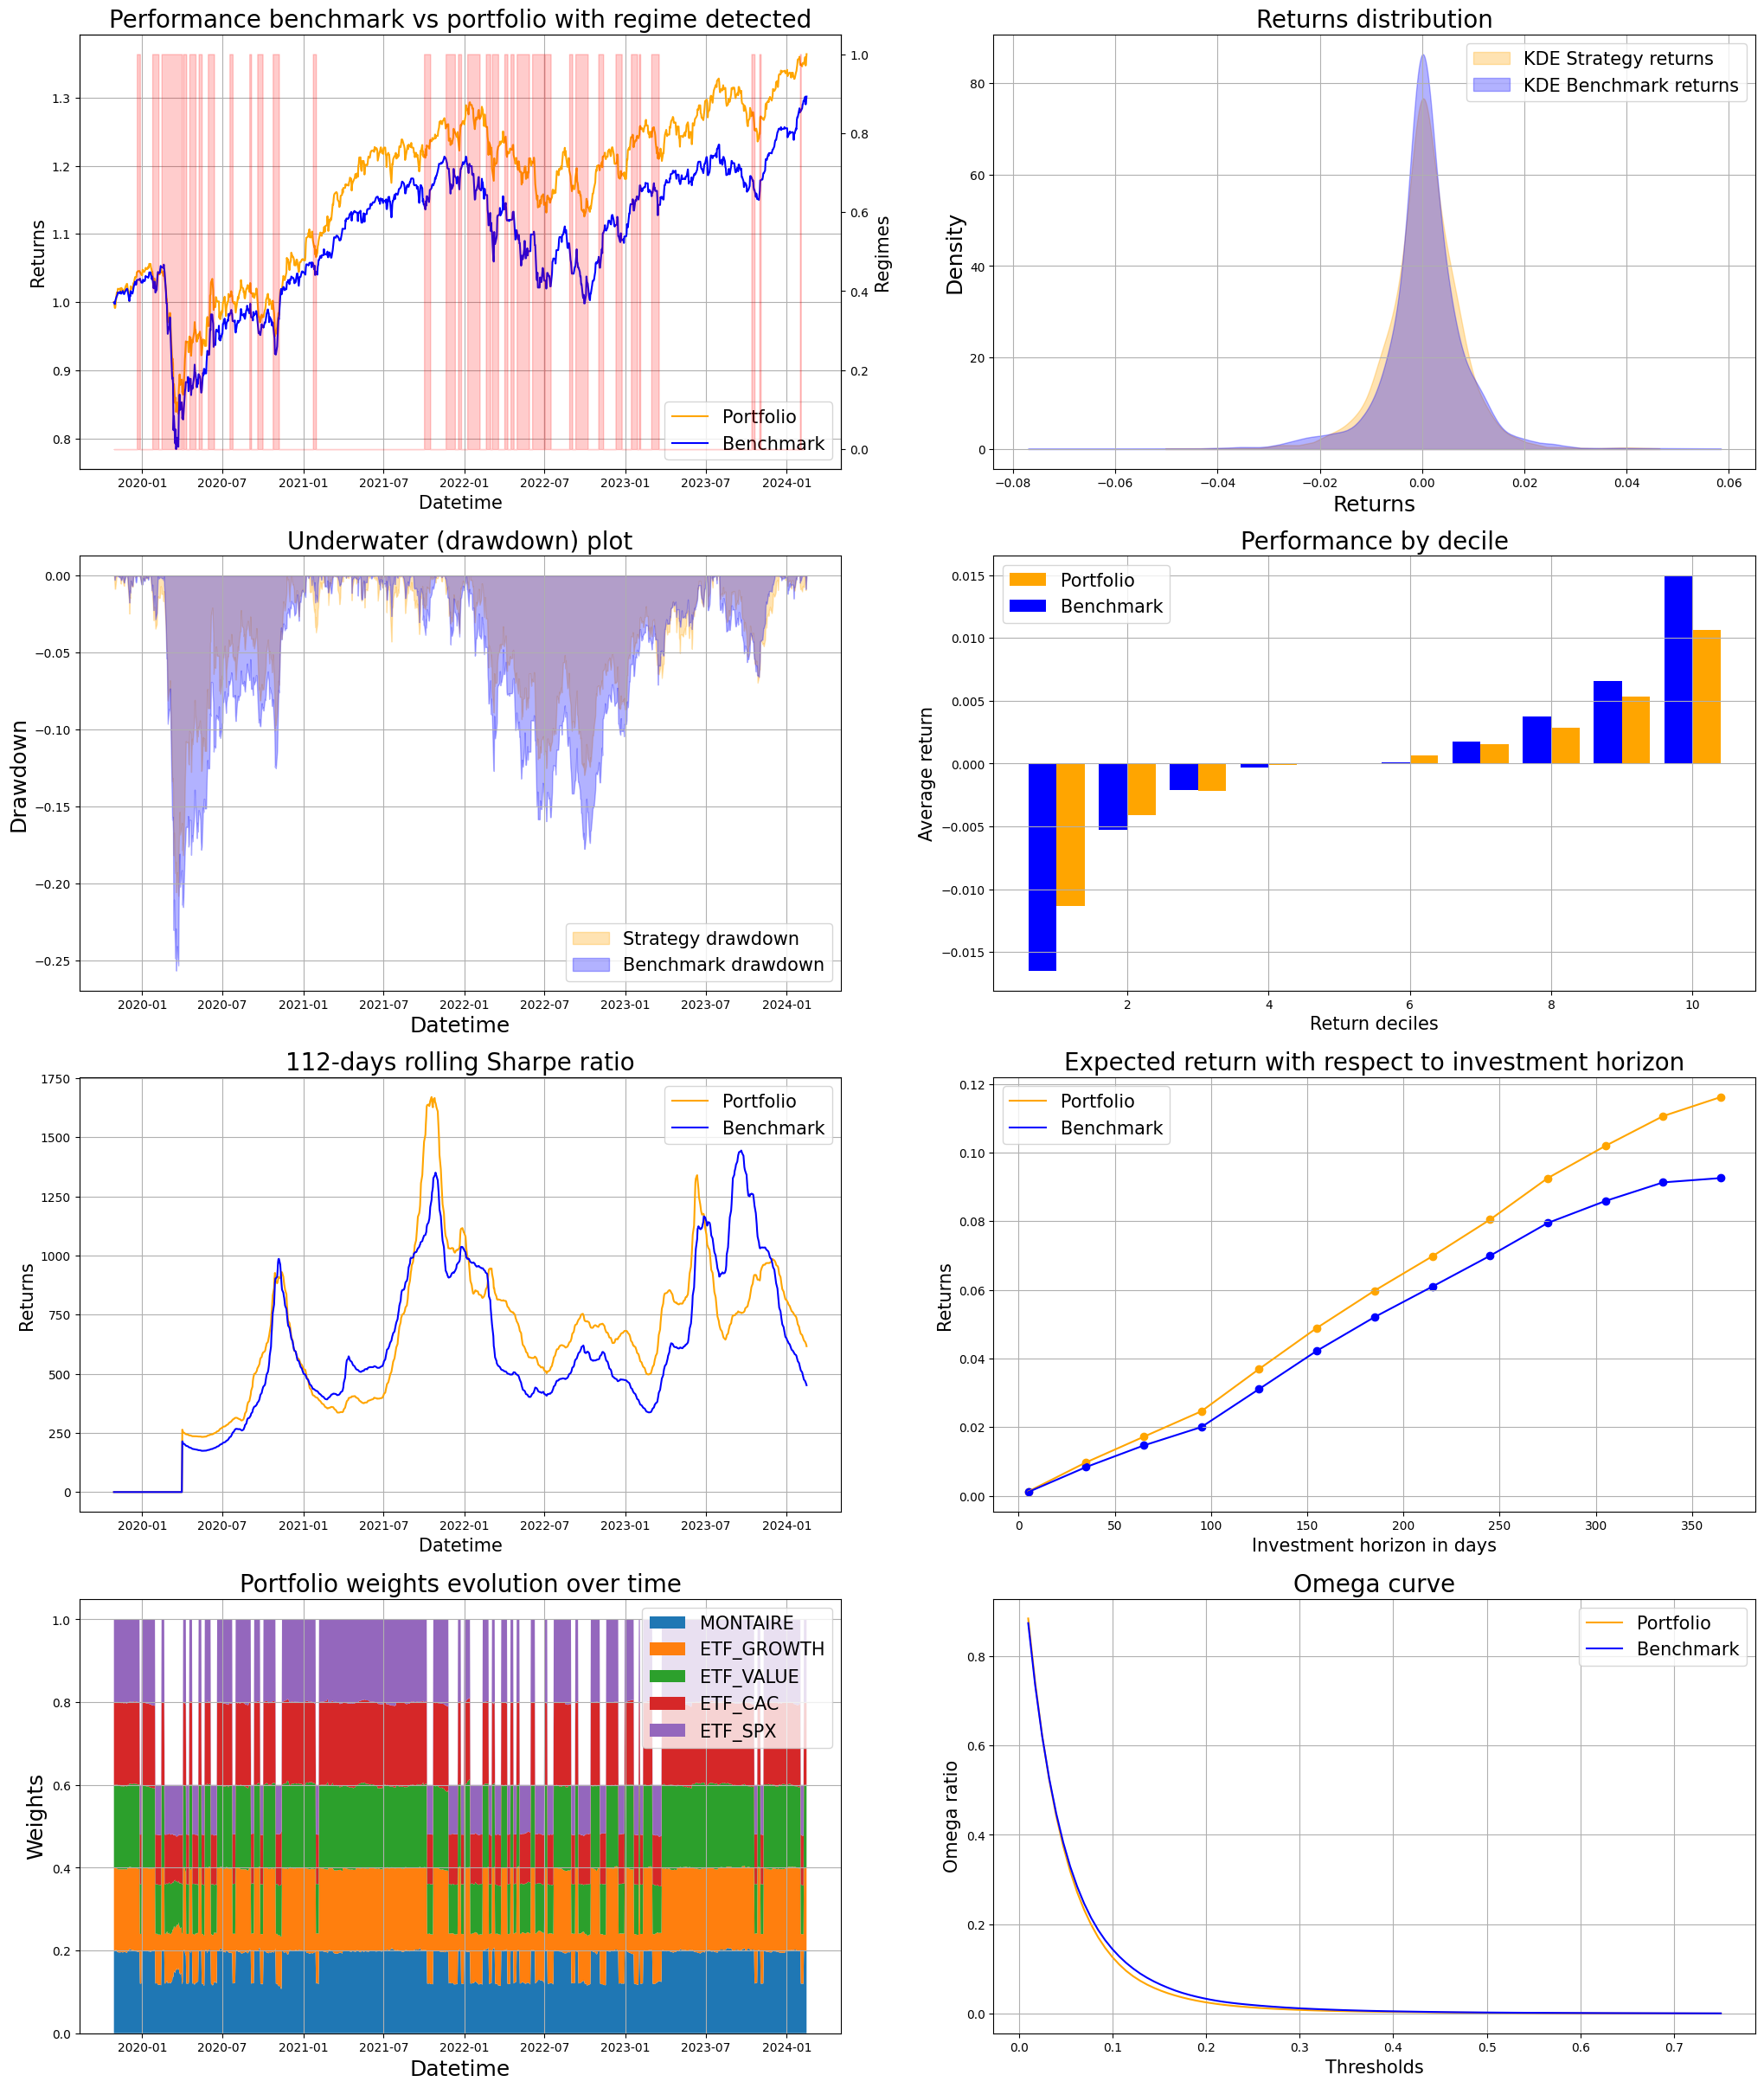

In [8]:

bk_tester = Backtester(
    universe_returns=univ_obj.get_universe_returns(),
    market_returns=universe["ETF_SPX"],
    benchmark_returns=bench_obj.benchmark_returns,
)


ptf_and_bench, ptf_weights_equal_weight, regimes, metrics_df = bk_tester.run_backtest(
    allocation_type=AllocationMethodsEnum.EQUALLY_WEIGHTED,
    rebalance_frequency=RebalanceFrequencyEnum.MONTH_END,
    market_regime_model=RegimeDetectionModels.HIDDEN_MARKOV_MODEL,
    transaction_cost_by_securities={k: 0.0015 for k in universe.columns},
    bearish_leverage_by_securities={'MONTAIRE': 1,
                                    'ETF_GROWTH': 1,
                                    'ETF_VALUE': 1,
                                    'ETF_CAC': 0.6,
                                    'ETF_SPX': 0.6},
    bullish_leverage_by_securities={'MONTAIRE': 1,
                                    'ETF_GROWTH': 1,
                                    'ETF_VALUE': 1,
                                    'ETF_CAC': 1,
                                    'ETF_SPX': 1},
    verbose=False,
)


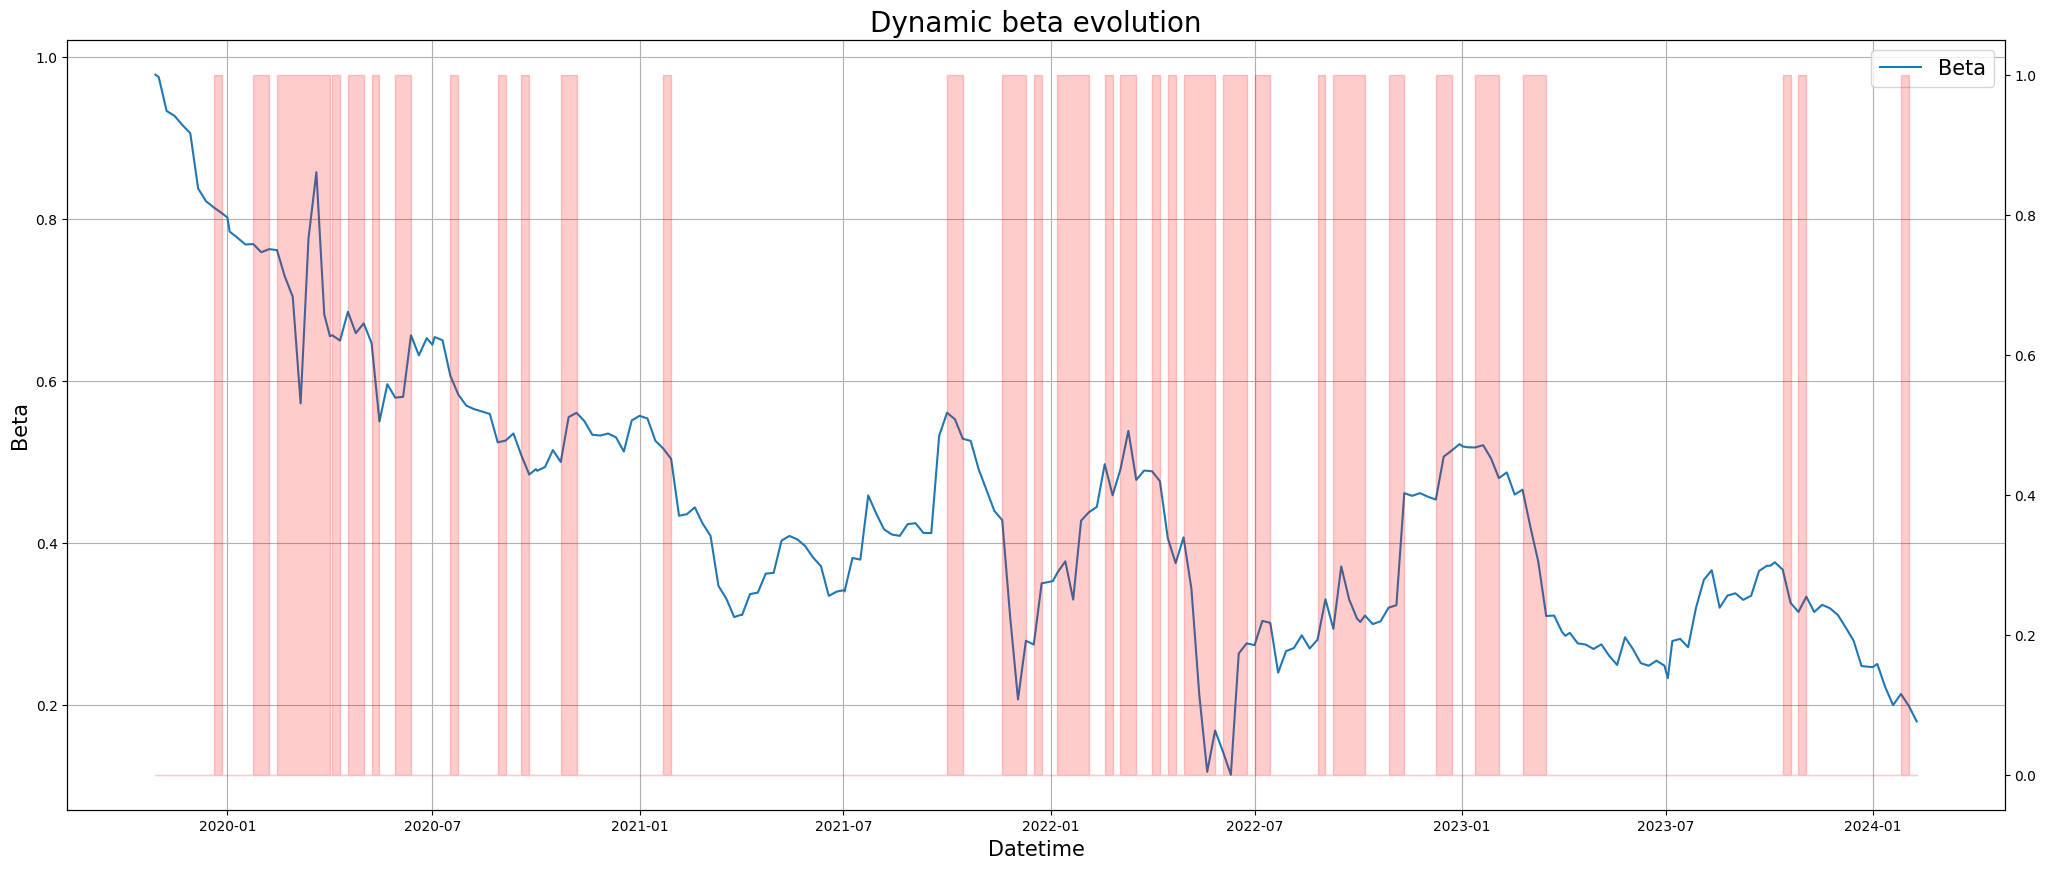

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))


ax.plot(regimes.index,regimes.next_beta, label="Beta")
ax_l = ax.twinx()
ax_l.fill_between(
    regimes.index,
    regimes["Regime"],
    alpha=0.2,
    color="red",
    step="pre",
)
ax.set_xlabel("Datetime", fontsize=15)
ax.set_ylabel("Beta", fontsize=15)
ax.set_title(f"Dynamic beta evolution", fontsize=20)
ax.grid()
ax.legend(fontsize=15)

